In [8]:
from autogluon.core import TabularDataset
from autogluon.tabular import TabularPredictor
import numpy as np
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

data_path= "automl_train_data.csv"
df=pd.read_csv(data_path) # path to colab notebook #replace this with the path to your dataset

bd_data = TabularDataset(data_path)
df_train,df_test=train_test_split(df,test_size=0.2,random_state=1)
data_path= "automl_train_data.csv"

predictor = TabularPredictor.load("./BDmodels/")
y_pred = predictor.predict(df_test)
y_true= df_test['subclass']
predictor.evaluate_predictions(y_true, y_pred)

{'accuracy': 0.7350035285815102,
 'balanced_accuracy': 0.32503990542669053,
 'mcc': 0.6632762643271053}

[[  0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   1   0   1   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0  12   0   0   0   0   0   0   0   0   2   0
    0]
 [  0   0   0   0   0   0   0   0  11   0   0   4   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   1  21  33   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


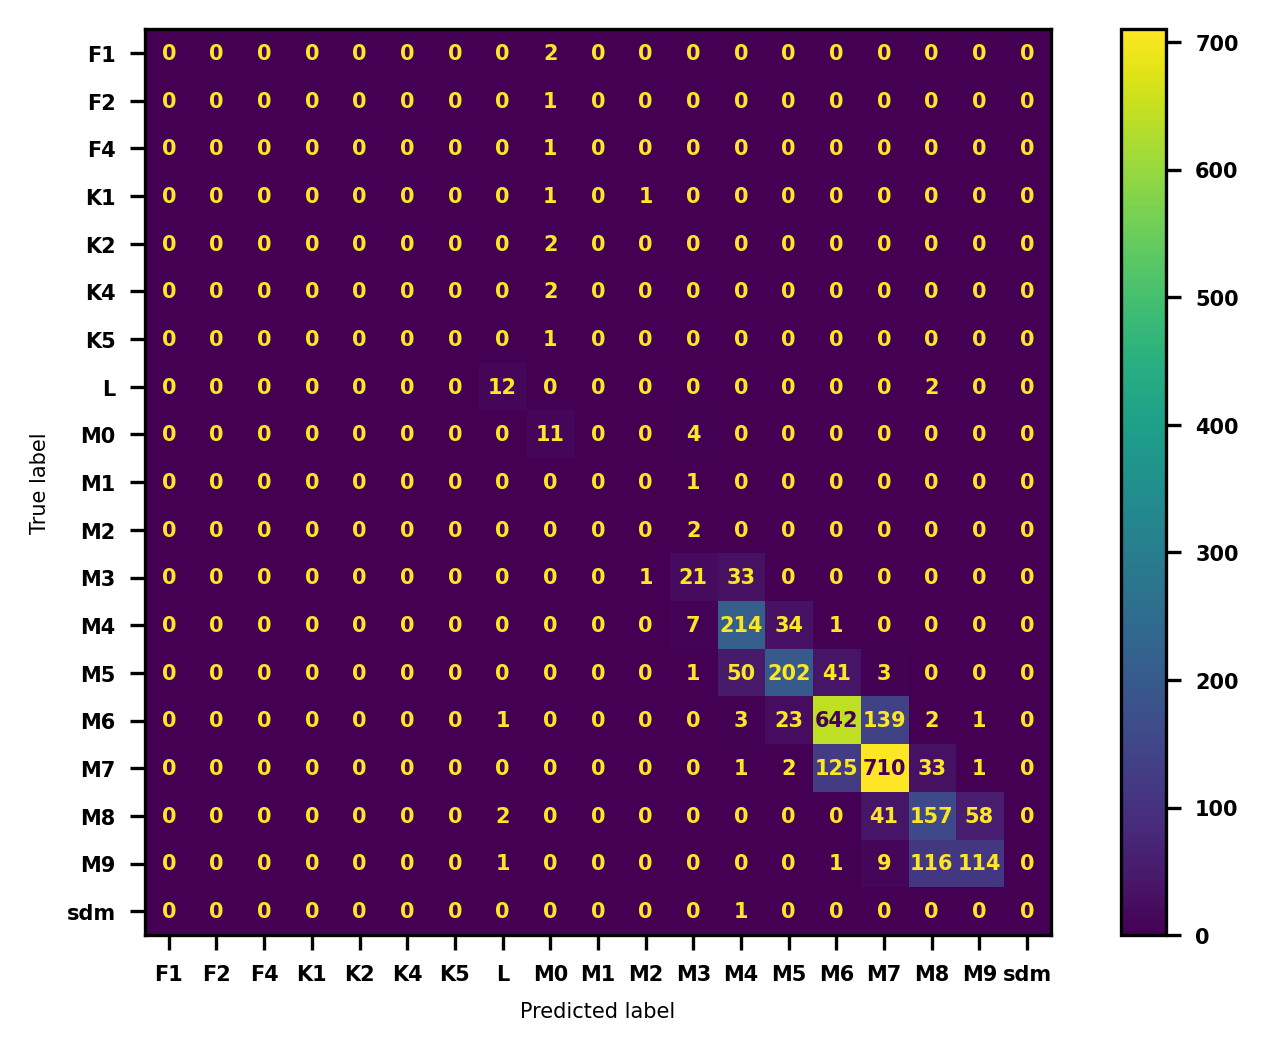

In [16]:
from sklearn.metrics import confusion_matrix
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 5}
plt.rc('font', **font)
plt.rcParams['savefig.dpi'] = 300  # 图片像素
plt.rcParams['figure.dpi'] = 300  # 分辨率
cm=confusion_matrix(y_true,y_pred)
print(cm)
ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

[[0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.5        0.         0.5        0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.    

<AxesSubplot:>

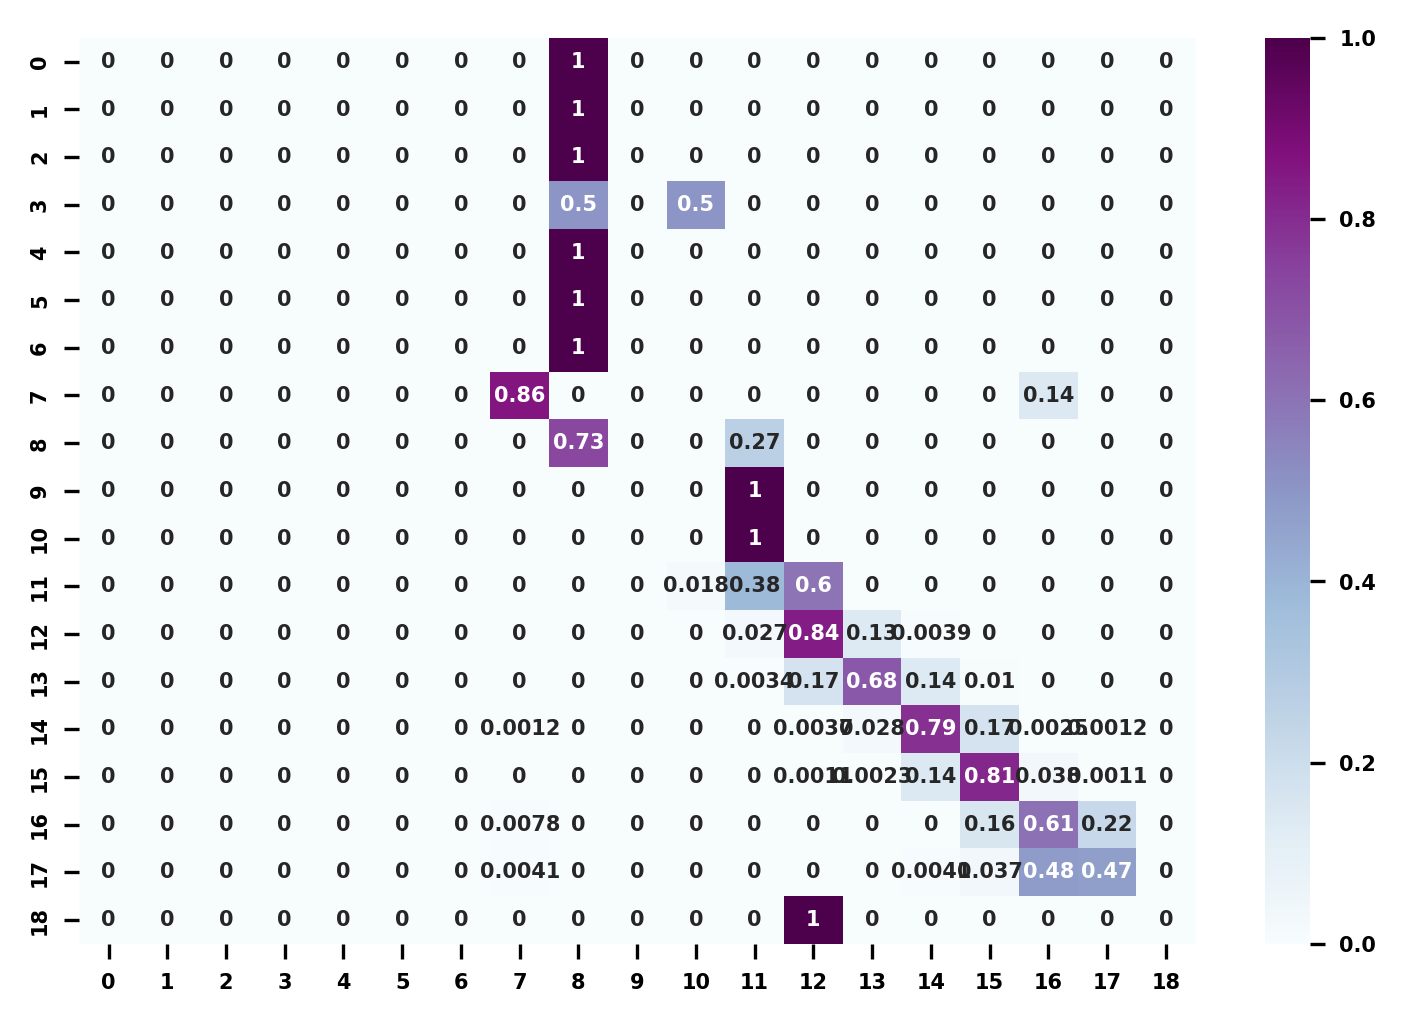

In [18]:
import seaborn as sn
cmpercent=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
print(cmpercent)
sn.heatmap(cmpercent, annot=True, cmap="BuPu")